### Przygotowanie zbioru danych

In [43]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

loans = pd.read_csv('D:/R/Studia/Kaggle/loand default praca/Loan_Default.csv')

### zaczytanie danych ze strony: https://www.kaggle.com/datasets/yasserh/loan-default-dataset

#### Nazwy zmiennych z małej litery

In [44]:
loans.columns = loans.columns.str.lower()

#### Usunięcie duplikatów

In [45]:
loans.duplicated().sum()

0

In [46]:
loans.drop_duplicates(inplace=True)

#### Zastąpienie pustych wartości średnią

In [47]:
loans.isna().sum()

loans = loans.fillna(loans.mean())

loans.isna().sum() 

C:\Users\marcl\AppData\Local\Temp\ipykernel_19884\1098397668.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  loans = loans.fillna(loans.mean())


id                              0
year                            0
loan_limit                   3344
gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
credit_worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest                0
interest_rate_spread            0
upfront_charges                 0
term                            0
neg_ammortization             121
interest_only                   0
lump_sum_payment                0
property_value                  0
construction_type               0
occupancy_type                  0
secured_by                      0
total_units                     0
income                          0
credit_type                     0
credit_score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
ltv           

#### Zastąpienie cechy age najczęściej występującą wartością

In [48]:
from sklearn.impute import SimpleImputer

simpimp = SimpleImputer(strategy = 'most_frequent')
loans[['age']] = simpimp.fit_transform(loans[['age']])

#### Kodowanie gorącojedynkowe

In [49]:
loans

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,0.441656,3224.996127,360.0,not_neg,not_int,not_lpsm,118000.000000,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.000000
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.045476,0.441656,3224.996127,360.0,not_neg,not_int,lpsm,497893.465696,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,72.746457,North,direct,1,37.732932
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,0.200000,595.000000,360.0,neg_amm,not_int,not_lpsm,508000.000000,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.000000
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,0.681000,3224.996127,360.0,not_neg,not_int,not_lpsm,658000.000000,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.000000
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,0.304200,0.000000,360.0,not_neg,not_int,not_lpsm,758000.000000,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125000,0.257100,9960.000000,180.0,not_neg,not_int,not_lpsm,608000.000000,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.000000
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190000,0.854400,0.000000,360.0,not_neg,not_int,not_lpsm,788000.000000,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.000000
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125000,0.081600,1226.640000,180.0,not_neg,not_int,not_lpsm,728000.000000,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.000000
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500000,0.582400,4323.330000,180.0,not_neg,not_int,not_lpsm,278000.000000,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.000000


In [50]:
loans = loans.iloc[:,2:]

loans = pd.get_dummies(loans, columns=['loan_type', 'age', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'term', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'region', 'security_type'], drop_first = True)

In [51]:
from sklearn.model_selection import train_test_split

import pandas as pd

##loans = pd.read_csv('D:/R/Studia/Kaggle/loand default praca/gotowe.csv', sep=';')



del loans['interest_rate_spread']
del loans['rate_of_interest']
del loans['upfront_charges']
del loans['credit_score']

### PCA

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import PCA

X= loans
X = loans.drop('status', axis=1)
y = loans['status']

def select_n_important_vars(X, y, n):
    X = X
    y = y
    pca = PCA(n_components=n, random_state=1)
    pca.fit(X)
    important_vars = list(X.columns[:n])
    important_vars_df = pd.DataFrame({'Variable': important_vars, 'Explained Variance': pca.explained_variance_ratio_[:n]})
    plt.figure(figsize=(10,6))
    plt.scatter(pca.components_[0], pca.components_[1])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('First Two Principal Components')
    plt.show()
    plt.figure(figsize=(10,6))
    plt.bar(important_vars_df['Variable'], important_vars_df['Explained Variance'])
    plt.xlabel('Variables')
    plt.ylabel('Explained Variance')
    plt.title('Explained Variance of Variables')
    plt.xticks(rotation=90)
    plt.show()
    return important_vars_df


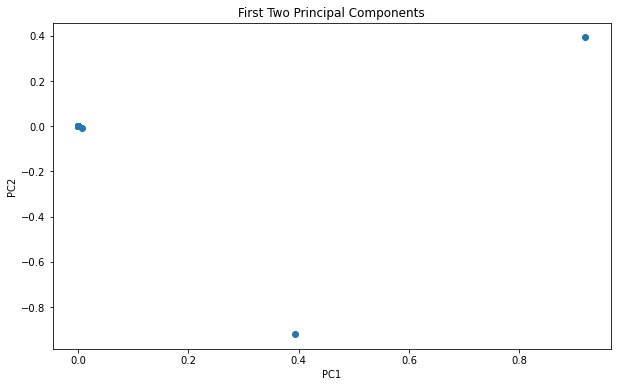

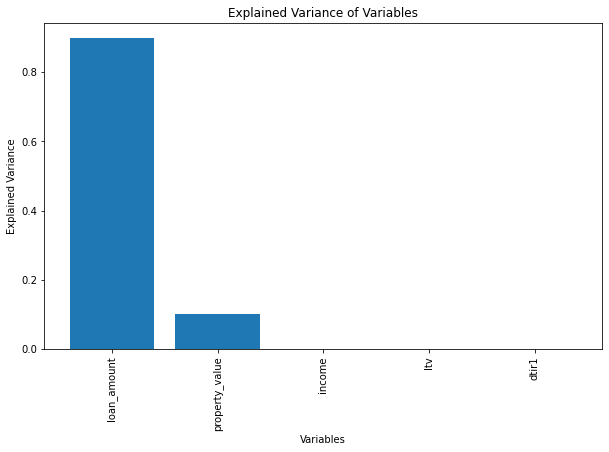

         Variable  Explained Variance
0     loan_amount        8.973909e-01
1  property_value        1.024007e-01
2          income        2.083970e-04
3             ltv        8.493915e-09
4           dtir1        5.651913e-10


In [57]:
selected_vars = select_n_important_vars(X, y, 5)
print(selected_vars)

### Istotność cech (drzewo)

In [52]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X= loans
X = loans.drop('status', axis=1)
y = loans['status']

feat_labels = X.columns

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X, y)
importances = forest.feature_importances_[forest.feature_importances_>=0.05]

indices = np.argsort(importances)[::-1]

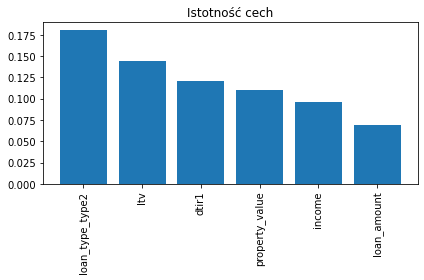

In [53]:
plt.title('Istotność cech')
plt.bar(feat_labels[indices],
        importances[indices],
       align='center')
plt.xticks(
          feat_labels[indices], rotation=90)
plt.tight_layout()
plt.show()

### Przygotowanie zbiorów

In [58]:
#X = loans[['loan_amount', 'property_value', 'income', 'ltv', 'dtir1', 'loan_type_type2', 'loan_type_type3', 'age_35-44']]
X = loans[['loan_amount', 'property_value', 'income', 'ltv', 'dtir1']]
#X = loans.drop('status', axis=1)
y = loans['status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



# Define the pipeline
pipeline = Pipeline([
    #('pca', PCA(n_components=5)),
    ('scaler', StandardScaler()),
])
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Transform the training, testing, and validation data
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)
X_val_transformed = pipeline.transform(X_val)

# Logistic Regression
logistic_regression = LogisticRegression(random_state=1)
logistic_regression.fit(X_train_transformed, y_train)

# SVM
svm = SVC(random_state=1)
svm.fit(X_train_transformed, y_train)

# Random Forest
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train_transfobrmed, y_train)


RandomForestClassifier(random_state=1)

Dokładność regresji logitycznej: 0.75
Dokładność SVM: 0.84
Dokładność drzew losowych: 0.86


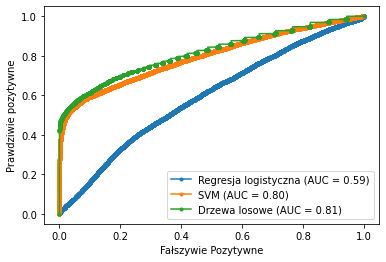

In [60]:
#### do pracy

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Logistic Regression
logistic_regression_pred = logistic_regression.predict(X_val_transformed)
logistic_regression_accuracy = accuracy_score(y_val, logistic_regression_pred)
logistic_regression_probs = logistic_regression.predict_proba(X_val_transformed)[:, 1]
logistic_regression_auc = roc_auc_score(y_val, logistic_regression_probs)
logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y_val, logistic_regression_probs)

# SVM
svm_pred = svm.predict(X_val_transformed)
svm_accuracy = accuracy_score(y_val, svm_pred)
svm_probs = svm.decision_function(X_val_transformed)
svm_auc = roc_auc_score(y_val, svm_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_val, svm_probs)

# Random Forest
random_forest_pred = random_forest.predict(X_val_transformed)
random_forest_accuracy = accuracy_score(y_val, random_forest_pred)
random_forest_probs = random_forest.predict_proba(X_val_transformed)[:, 1]
random_forest_auc = roc_auc_score(y_val, random_forest_probs)
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_val, random_forest_probs)

print(f"Dokładność regresji logitycznej: {logistic_regression_accuracy:.2f}")
print(f"Dokładność SVM: {svm_accuracy:.2f}")
print(f"Dokładność drzew losowych: {random_forest_accuracy:.2f}")

# krzywe ROC
plt.step(logistic_regression_fpr, logistic_regression_tpr, marker='.', label=f'Regresja logistyczna (AUC = {logistic_regression_auc:.2f})')
plt.step(svm_fpr, svm_tpr, marker='.', label=f'SVM (AUC = {svm_auc:.2f})')
plt.step(random_forest_fpr, random_forest_tpr, marker='.', label=f'Drzewa losowe (AUC = {random_forest_auc:.2f})')

# Customize the plot
plt.xlabel('Fałszywie Pozytywne')
plt.ylabel('Prawdziwie pozytywne')
plt.legend()
plt.show()


Logistic Regression Accuracy: 0.75
SVM Accuracy: 0.84
Random Forest Accuracy: 0.86


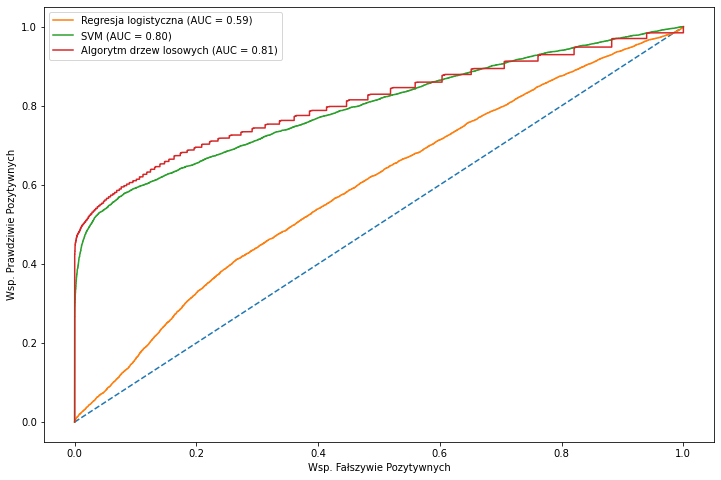

In [61]:
print(f"Logistic Regression Accuracy: {logistic_regression_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Random Forest Accuracy: {random_forest_accuracy:.2f}")

plt.figure(figsize=(12, 8))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.step(logistic_regression_fpr, logistic_regression_tpr, where='post', label=f'Regresja logistyczna (AUC = {logistic_regression_auc:.2f})')
plt.step(svm_fpr, svm_tpr, where='post', label=f'SVM (AUC = {svm_auc:.2f})')
plt.step(random_forest_fpr, random_forest_tpr, where='post', label=f'Algorytm drzew losowych (AUC = {random_forest_auc:.2f})')

plt.xlabel('Wsp. Fałszywie Pozytywnych')
plt.ylabel('Wsp. Prawdziwie Pozytywnych')
plt.legend() 
plt.show()

### Modele wytrenowane po parametryzacji

In [ ]:
### do pracy

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#95.64024188211937

pipeline = Pipeline([
    #('pca', PCA(n_components=5)),
    ('scaler', StandardScaler()),
])

pipeline.fit(X_train, y_train)

# Transform the training, testing, and validation data
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)
X_val_transformed = pipeline.transform(X_val)

# Logistic Regression
logistic_regression = LogisticRegression(C=95.64024188211937,random_state=1)
logistic_regression.fit(X_train_transformed, y_train)

# SVM
svm = SVC(C= 98.73124596400379, random_state=1)
svm.fit(X_train_transformed, y_train)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=366, random_state=1)
random_forest.fit(X_train_transformed, y_train)

In [ ]:
#### do pracy

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Logistic Regression
logistic_regression_pred = logistic_regression.predict(X_val_transformed)
logistic_regression_accuracy = accuracy_score(y_val, logistic_regression_pred)
logistic_regression_probs = logistic_regression.predict_proba(X_val_transformed)[:, 1]
logistic_regression_auc = roc_auc_score(y_val, logistic_regression_probs)
logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y_val, logistic_regression_probs)

# SVM
svm_pred = svm.predict(X_val_transformed)
svm_accuracy = accuracy_score(y_val, svm_pred)
svm_probs = svm.decision_function(X_val_transformed)
svm_auc = roc_auc_score(y_val, svm_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_val, svm_probs)

# Random Forest
random_forest_pred = random_forest.predict(X_val_transformed)
random_forest_accuracy = accuracy_score(y_val, random_forest_pred)
random_forest_probs = random_forest.predict_proba(X_val_transformed)[:, 1]
random_forest_auc = roc_auc_score(y_val, random_forest_probs)
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_val, random_forest_probs)

print(f"Dokładność regresji logitycznej: {logistic_regression_accuracy:.2f}")
print(f"Dokładność SVM: {svm_accuracy:.2f}")
print(f"Dokładność drzew losowych: {random_forest_accuracy:.2f}")

# krzywe ROC
plt.step(logistic_regression_fpr, logistic_regression_tpr, marker='.', label=f'Regresja logistyczna (AUC = {logistic_regression_auc:.2f})')
plt.step(svm_fpr, svm_tpr, marker='.', label=f'SVM (AUC = {svm_auc:.2f})')
plt.step(random_forest_fpr, random_forest_tpr, marker='.', label=f'Drzewa losowe (AUC = {random_forest_auc:.2f})')

# Customize the plot
plt.xlabel('Fałszywie Pozytywne')
plt.ylabel('Prawdziwie pozytywne')
plt.legend()
plt.show()


In [ ]:
print(f"Logistic Regression Accuracy: {logistic_regression_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Random Forest Accuracy: {random_forest_accuracy:.2f}")

plt.figure(figsize=(12, 8))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.step(logistic_regression_fpr, logistic_regression_tpr, where='post', label=f'Regresja logistyczna (AUC = {logistic_regression_auc:.2f})')
plt.step(svm_fpr, svm_tpr, where='post', label=f'SVM (AUC = {svm_auc:.2f})')
plt.step(random_forest_fpr, random_forest_tpr, where='post', label=f'Algorytm drzew losowych (AUC = {random_forest_auc:.2f})')

plt.xlabel('Wsp. Fałszywie Pozytywnych')
plt.ylabel('Wsp. Prawdziwie Pozytywnych')
plt.legend() 
plt.show()

#### koniec


### Kroswalidacja

Classifier: LogisticRegression
Dokładność: 0.75
AUC: 0.58
Classifier: RandomForestClassifier
Dokładność: 0.85
AUC: 0.80
Classifier: SVC
Dokładność: 0.82
AUC: 0.77


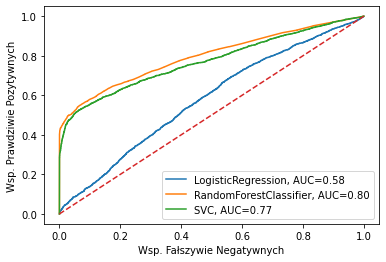

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

X_kros, X_kros_t, y_kros, y_kros_t = train_test_split(X_train, y_train, test_size=0.9, random_state=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kros)




classifiers = [
    LogisticRegression(random_state=1),
    RandomForestClassifier(random_state=1),
    SVC(probability=True, random_state=1)
]


for classifier in classifiers:
    kfold = KFold(n_splits=5)
    y_probs = cross_val_predict(classifier, X_scaled, y_kros, method="predict_proba")[:, 1]
    fpr, tpr, thresholds = roc_curve(y_kros, y_probs)
    auc = roc_auc_score(y_kros, y_probs)
    accuracy = cross_val_score(classifier, X_scaled, y_kros, cv=kfold).mean()
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Dokładność: {accuracy:.2f}")
    print(f"AUC: {auc:.2f}")
    plt.plot(fpr, tpr, label=f"{classifier.__class__.__name__}, AUC={auc:.2f}")


plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("Wsp. Fałszywie Negatywnych")
plt.ylabel("Wsp. Prawdziwie Pozytywnych")
#plt.title("ROC Curves")
plt.legend()
plt.show()


### Korelacja

In [ ]:
corr_df = X.corr()

import seaborn as sns

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', ax=ax)

### Strojenie hiperparametrów

In [ ]:
####do pracy

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

pipeline = Pipeline([
    #('pca', PCA(n_components=5)),
    ('scaler', StandardScaler()),
])
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Transform the training, testing, and validation data
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)
X_val_transformed = pipeline.transform(X_val)


# Define the parameter distributions for RandomizedSearchCV
param_dist_logistic_regression = {'C': uniform(0.001, 100)}
param_dist_svm = {'C': uniform(0.001, 100)} #'kernel': ['linear', 'rbf', 'poly']}
param_dist_random_forest = {'n_estimators': uniform(100, 400)}

# Randomized search for Logistic Regression
random_search_logistic_regression = RandomizedSearchCV(logistic_regression, param_distributions=param_dist_logistic_regression, n_iter=100, cv=5)
random_search_logistic_regression.fit(X_scaled, y_kros)

# Randomized search for SVM
random_search_svm = RandomizedSearchCV(svm, param_distributions=param_dist_svm, n_iter=100, cv=5)
random_search_svm.fit(X_scaled, y_kros)

# Randomized search for Random Forest
param_dist_random_forest = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]}
random_search_random_forest = RandomizedSearchCV(random_forest, param_distributions=param_dist_random_forest, n_iter=100, cv=5)
random_search_random_forest.fit(X_scaled, y_kros)


# Best parameters and best score for Logistic Regression
print("Best parameters for Logistic Regression: ", random_search_logistic_regression.best_params_)
print("Best score for Logistic Regression: ", random_search_logistic_regression.best_score_)

# Best parameters and best score for SVM
print("Best parameters for SVM: ", random_search_svm.best_params_)
print("Best score for SVM: ", random_search_svm.best_score_)

# Best parameters and best score for Random Forest
print("Best parameters for Random Forest: ", random_search_random_forest.best_params_)
print("Best score for Random Forest: ", random_search_random_forest.best_score_)


import matplotlib.pyplot as plt
from sklearn import metrics

# Predict on the test set using the best parameters
y_pred_logistic_regression = random_search_logistic_regression.predict(X_val_transformed)
y_pred_svm = random_search_svm.predict(X_val_transformed)
y_pred_random_forest = random_search_random_forest.predict(X_val_transformed)

# Accuracy of each model
accuracy_logistic_regression = metrics.accuracy_score(y_val, y_pred_logistic_regression)
accuracy_svm = metrics.accuracy_score(y_val, y_pred_svm)
accuracy_random_forest = metrics.accuracy_score(y_val, y_pred_random_forest)

print("Accuracy of Logistic Regression: ", accuracy_logistic_regression)
print("Accuracy of SVM: ", accuracy_svm)
print("Accuracy of Random Forest: ", accuracy_random_forest)